# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries

import tensorflow as tf

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score

# Load and explore data

In [2]:
# Read data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# View which columns are categorical
df.describe().select_dtypes(exclude=['int', 'float']).columns

Index([], dtype='object')

In [6]:
#check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# How many rows are in our dataset?
len(df)

284807

In [8]:
# How many columns are in our dataset?
len(df.columns)

31

In [9]:
df.shape

(284807, 31)

In [10]:
# print fraud transaction details
print (df.Time[df.Class == 1].describe())

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [11]:
# print normal transaction details
print (df.Time[df.Class == 0].describe())

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


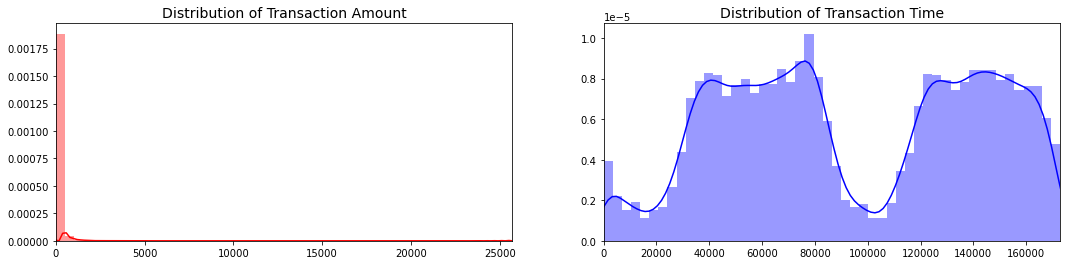

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='red')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='blue')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

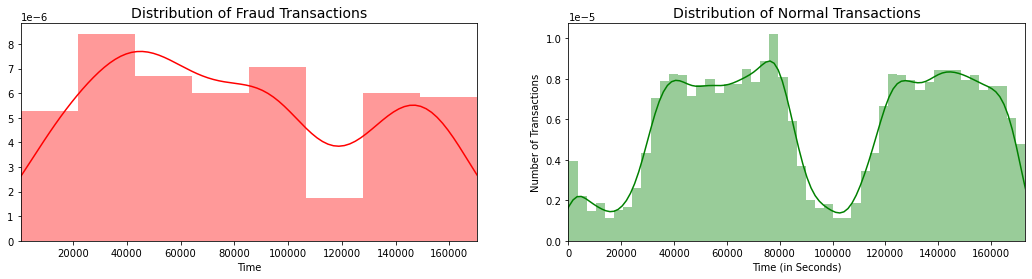

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

fraud_val = df.Time[df.Class == 1]
normal_val = df.Time[df.Class == 0]

sns.distplot(fraud_val, ax=ax[0], color='red')
ax[0].set_title('Distribution of Fraud Transactions', fontsize=14)
ax[0].set_xlim([min(fraud_val), max(fraud_val)])

sns.distplot(normal_val, ax=ax[1], color='green')
ax[1].set_title('Distribution of Normal Transactions', fontsize=14)
ax[1].set_xlim([min(normal_val), max(normal_val)])

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

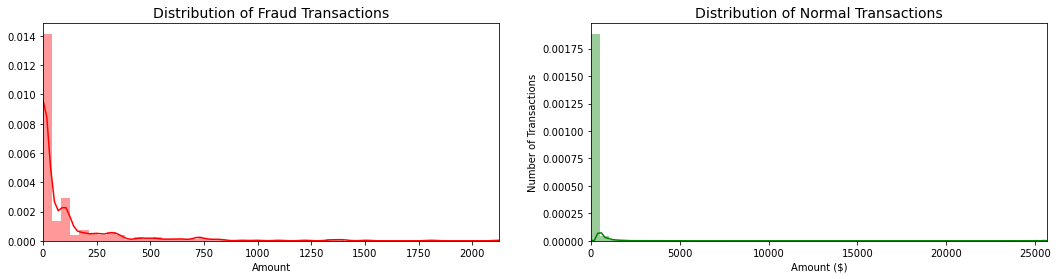

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

fraud_amt = df.Amount[df.Class == 1]
normal_amt = df.Amount[df.Class == 0]

sns.distplot(fraud_amt, ax=ax[0], color='red')
ax[0].set_title('Distribution of Fraud Transactions', fontsize=14)
ax[0].set_xlim([min(fraud_amt), max(fraud_amt)])

sns.distplot(normal_amt, ax=ax[1], color='green')
ax[1].set_title('Distribution of Normal Transactions', fontsize=14)
ax[1].set_xlim([min(normal_amt), max(normal_amt)])

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.show()

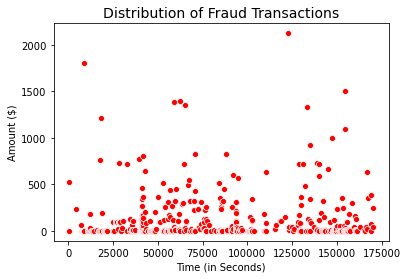

In [15]:
ax = sns.scatterplot(data=df,x= df.Time[df.Class == 1], y= df.Amount[df.Class == 1], color='red')
ax.set_title('Distribution of Fraud Transactions', fontsize=14)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount ($)')
plt.show()

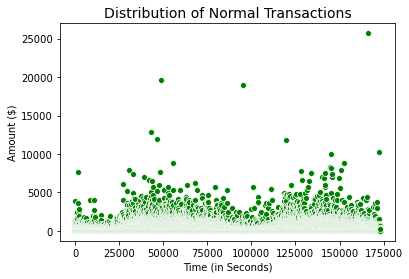

In [16]:
ax = sns.scatterplot(data=df,x= df.Time[df.Class == 0], y= df.Amount[df.Class == 0], color='green')
ax.set_title('Distribution of Normal Transactions', fontsize=14)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount ($)')
plt.show()

In [17]:
# Shuffle the entire data set (applies to both train & test)
df = df.sample(frac=1).reset_index(drop=True)
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [18]:
print(x[:3])

[[ 1.46505000e+05 -1.78043134e+00  1.26247214e+00 -2.82067728e-02
   3.46470055e+00  2.36484841e+00  6.61811334e-01  3.65403106e-01
   6.10883629e-01 -1.71939649e+00 -2.90104283e-01 -1.02626768e-01
  -1.55234583e+00 -1.72074912e+00 -2.15883744e+00  5.07478902e-01
   7.11063429e-01  2.57439594e+00 -6.72858504e-01 -2.37583639e+00
  -4.38498421e-01 -4.12616684e-01 -1.22379273e+00 -5.75560536e-01
  -1.42910968e+00  1.83772349e-01 -7.78258856e-02 -3.74464794e-01
  -5.34923199e-01  3.64000000e+00]
 [ 8.13690000e+04  7.44251708e-01 -8.83520279e-01  1.25267829e+00
   7.76134115e-01 -1.53586930e+00 -1.57826688e-01 -6.82775917e-01
   2.00596327e-01  5.62858222e-01 -2.32257952e-03  1.33057403e+00
   5.06603125e-01 -5.97322583e-01  1.92446724e-01  9.94741377e-01
   1.04677349e+00 -8.21005035e-01  9.91005125e-01 -4.64816830e-01
   2.95035310e-01  4.01985997e-01  6.79283587e-01 -1.89951171e-01
   5.84367002e-01  5.20301251e-02  4.21812398e-01 -2.53760095e-02
   5.80361844e-02  2.09400000e+02]
 [ 1.5

In [19]:
print(y[:3])

[0 0 0]


# Creating train and test data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# Data Preprocessing

In [21]:
from sklearn.preprocessing import StandardScaler

# creating scaler object for encoding
scaler = StandardScaler()
# applying StandardScaler on x_train and x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Creation

In [23]:
n_inputs = x_train.shape[1]

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(n_inputs, activation='relu',input_shape=(n_inputs,)),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
predictions = model(x_train[:1]).numpy()
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])     

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 62        
Total params: 1,922
Trainable params: 1,922
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
7292/7292 - 5s - loss: 0.3171 - accuracy: 0.9969 - val_loss: 0.3147 - val_accuracy: 0.9985
Epoch 2/20
7292/7292 - 5s - loss: 0.3151 - accuracy: 0.9982 - val_loss: 0.3147 - val_accuracy: 0.9985
Epoch 3/20
7292/7292 - 5s - loss: 0.3151 - accuracy: 0.9982 - val_loss: 0.3147 - val_accuracy: 0.9985
Epoch 4/20
7292/7292 - 6s - loss: 0.3151 - accuracy: 0.9982 - val_loss: 0.3147 - val_accuracy: 0.9985
Epoch 5/20
7292/7292 - 5s - loss: 0.3151 - accuracy: 0.9982 - val_loss: 0.3147 - val_accuracy: 0.9985
Epoch 6/20
7292/7292 - 5s - loss: 0.3151 - accuracy: 0.9982 - val_loss: 0.3147 - val_accuracy: 0.9985
Epoch 7/20
7292/7292 - 5s - loss: 0.3151 - accuracy: 0.9982 - val_loss: 0.3147 - val_accuracy: 0.9985
Epoch 8/20
7292/7292 - 5s - loss: 0.3151 - accuracy: 0.9982 - val_loss: 0.3147 - val_accuracy: 0.9985
Epoch 9/20
7292/7292 - 5s - loss: 0.3151 - accuracy: 0.9982 - val_loss: 0.3147 - val_accuracy: 0.9985
Epoch 10/20
7292/7292 - 5s - loss: 0.3151 - accuracy: 0.9982 - val_loss: 0.3147 - 

# Model Evaluation

In [26]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [27]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
print('PR AUC: %.3f' % auc_score)

PR AUC: 0.501


In [28]:
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC %.3f' % roc_auc)

ROC AUC 0.500
